In [12]:
%reset -f
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, RationalQuadratic
import pandas as pd
import datetime as dt

sns.set(style='white', palette='deep', color_codes=True)

%matplotlib inline

In [13]:
kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
data=pd.read_excel('../models/Multi_dimentional_data_covar/01_Projektion.xlsx',skiprows=7).dropna(axis=1,how='all')


data = data[['Datum','CDU/CSU','SPD','Linke','Grüne','FDP','AfD']].dropna()

Y = data[['CDU/CSU','SPD','Linke','Grüne','FDP','AfD']]
X = pd.to_datetime(data.Datum)
X=-(X-dt.date.today()).astype('timedelta64[D]').reshape(-1,1)
#times=np.arange(len(Y['CDU/CSU']))
#X = times.reshape(-1, 1)


/opt/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [14]:
data

,Datum,CDU/CSU,SPD,Linke,Grüne,FDP,AfD
344,2013-04-26,40.0,28.0,6.0,14.0,4.0,3.0
345,2013-05-17,41.0,29.0,6.0,13.0,4.0,3.0
346,2013-06-07,42.0,28.0,6.0,13.0,4.0,3.0
347,2013-06-28,43.0,26.0,6.0,13.0,4.0,3.0
348,2013-07-12,41.0,26.0,7.0,13.0,5.0,3.0
352,2013-08-29,41.0,26.0,7.0,12.0,6.0,3.0
353,2013-09-05,41.0,26.0,8.0,10.0,6.0,3.0
354,2013-09-13,40.0,26.0,8.0,11.0,6.0,4.0
355,2013-09-19,40.0,27.0,9.0,9.0,6.0,4.0
356,2013-09-27,43.0,26.0,10.0,7.0,3.0,5.0


In [15]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
gp.fit(X, Y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 + Matern(length_scale=2, nu=1.5) + WhiteKernel(noise_level=1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [16]:
gp.kernel_

20.1**2 + Matern(length_scale=105, nu=1.5) + WhiteKernel(noise_level=0.575)

In [96]:
x_pred = np.linspace(X[0,0],X[-1,0]-140, 1000).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)

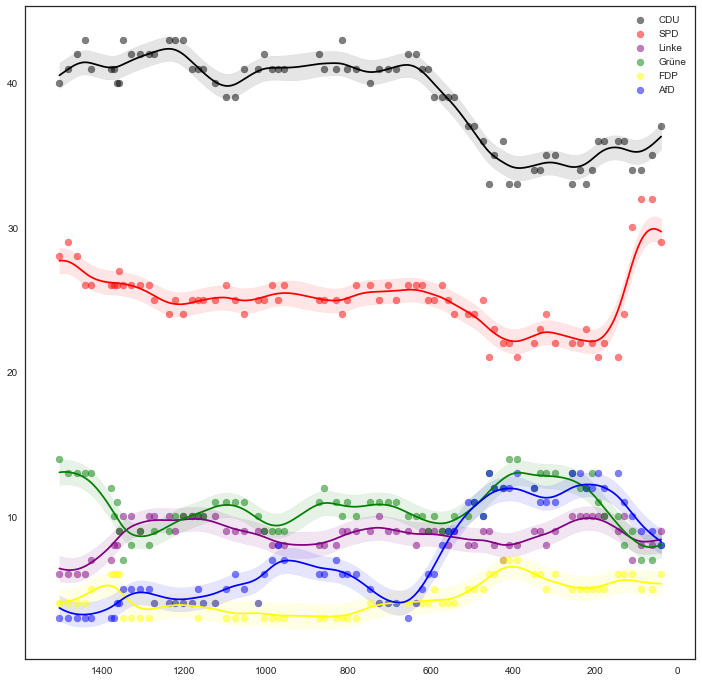

In [18]:
fig,ax = plt.subplots(1,figsize=(12,12))
for y,c in zip(y_pred.T,['black','red','purple','green','yellow','blue']):
    ax.fill_between(x_pred[:,0],y-sigma,y+sigma,alpha=.1,color=c)
    ax.plot(x_pred,y,c=c)
ax.scatter(X[:,0],Y['CDU/CSU'],c='black',alpha=.5,label='CDU')
ax.scatter(X[:,0],Y.SPD,c='red',alpha=.5,label='SPD')
ax.scatter(X[:,0],Y['Linke'],c='purple',alpha=.5,label='Linke')
ax.scatter(X[:,0],Y.Grüne,c='green',alpha=.5,label='Grüne')
ax.scatter(X[:,0],Y.FDP,c='yellow',alpha=.5,label='FDP')
ax.scatter(X[:,0],Y.AfD,c='blue',alpha=.5,label='AfD')
ax.invert_xaxis()
ax.legend();
#plt.scatter(X[:,0],Y.AfD,alpha=.25)


In [66]:
import GPflow

k = GPflow.kernels.Matern32(1, variance=1, lengthscales=1.2)

In [67]:
m = GPflow.gpr.GPR(X, pd.DataFrame.as_matrix(Y), kern=k)


In [68]:
m.optimize()

      fun: 673.82742408474974
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -6.85633854e-06,   1.69340718e-05,  -1.23499743e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 53
      nit: 43
   status: 0
  success: True
        x: array([  8.42775547e+02,   3.00011321e+02,  -2.86339008e-01])

In [69]:
mean,var = m.predict_y(x_pred)

In [70]:
var.shape

(1000, 6)

In [71]:

def plot(m):
    fig,ax = plt.subplots(1,figsize=(12,12))

    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(x_pred)
    #plt.plot(X, Y, 'kx', mew=2)
    for y,std,c in zip(mean.T,np.sqrt(var.T),['black','red','purple','green','yellow','blue']):
        ax.fill_between(x_pred[:,0],y- 2*std,y+ 2*std,alpha=.1,color=c)
        ax.plot(x_pred,y,c=c)

    ax.scatter(X[:,0],Y['CDU/CSU'],c='black',alpha=.5,label='CDU')
    ax.scatter(X[:,0],Y.SPD,c='red',alpha=.5,label='SPD')
    ax.scatter(X[:,0],Y['Linke'],c='purple',alpha=.5,label='Linke')
    ax.scatter(X[:,0],Y.Grüne,c='green',alpha=.5,label='Grüne')
    ax.scatter(X[:,0],Y.FDP,c='yellow',alpha=.5,label='FDP')
    ax.scatter(X[:,0],Y.AfD,c='blue',alpha=.5,label='AfD')
    ax.invert_xaxis()
    ax.legend();


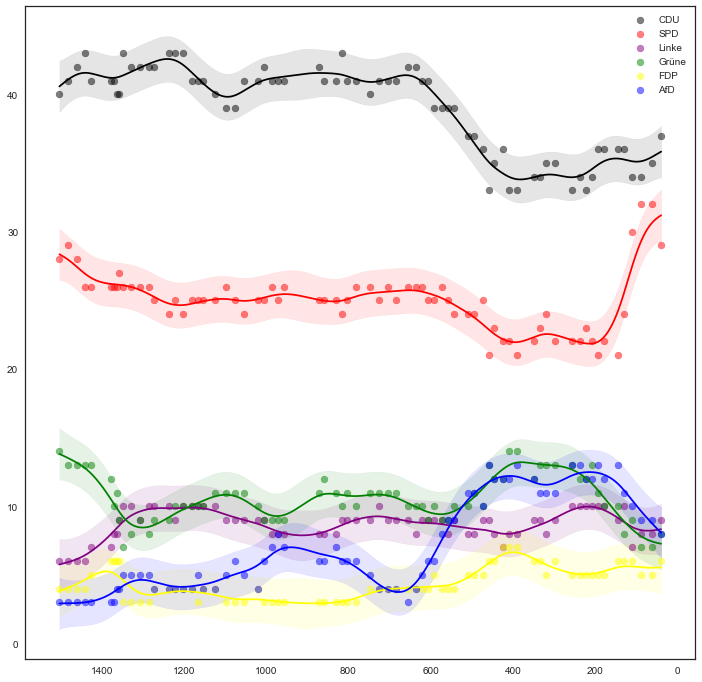

In [73]:
plot(m)

In [85]:
samples = m.sample(2000, epsilon=0.015, verbose=1)


Iteration:  100 	 Acc Rate:  97.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  100.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  100.0 %
Iteration:  1300 	 Acc Rate:  99.0 %
Iteration:  1400 	 Acc Rate:  100.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc Rate:  100.0 %
Iteration:  1700 	 Acc Rate:  99.0 %
Iteration:  1800 	 Acc Rate:  100.0 %
Iteration:  1900 	 Acc Rate:  100.0 %
Iteration:  2000 	 Acc Rate:  100.0 %


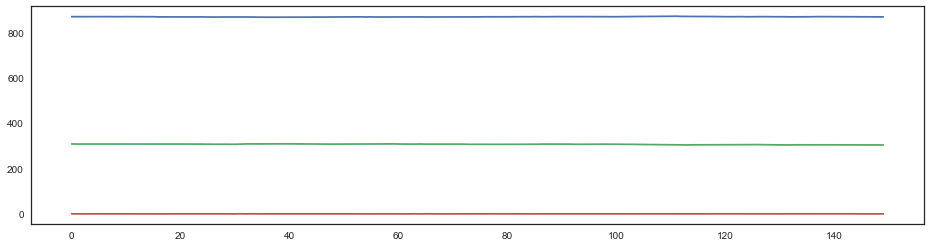

In [80]:
plt.figure(figsize=(16, 4))
plt.plot(samples)

In [86]:
sample_df = m.get_samples_df(samples)[::100]
sample_df.head()


,name.kern.lengthscales,name.kern.variance,name.likelihood.variance
0,[867.539404473],[303.201629096],[0.529696348655]
100,[866.957583793],[304.656134757],[0.545213066982]
200,[868.581912251],[305.800887857],[0.511273224207]
300,[868.128937389],[303.686723689],[0.496822077676]
400,[869.235402424],[305.061210823],[0.639543744287]


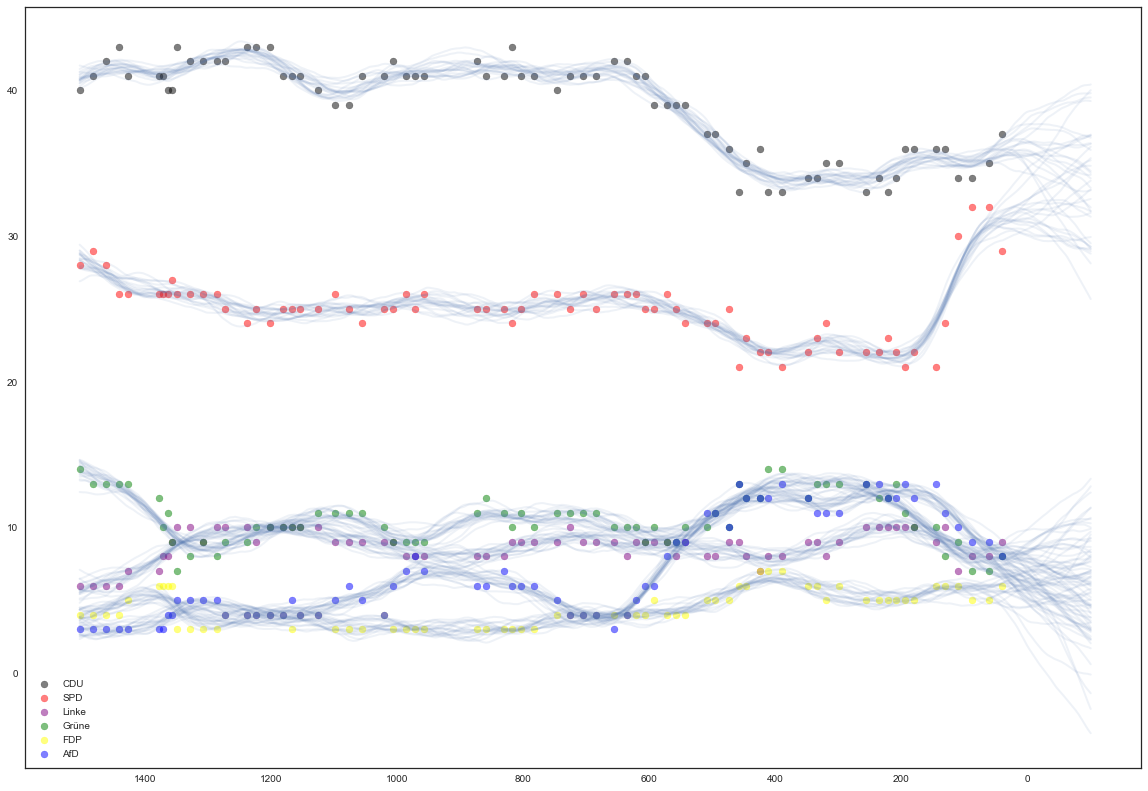

In [97]:
fig, ax = plt.subplots(1,figsize=(20, 14))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(x_pred, 1)
    ax.plot(x_pred, f[0,:,:], 'b', lw=2, alpha = 0.09)

ax.scatter(X[:,0],Y['CDU/CSU'],c='black',alpha=.5,label='CDU')
ax.scatter(X[:,0],Y.SPD,c='red',alpha=.5,label='SPD')
ax.scatter(X[:,0],Y['Linke'],c='purple',alpha=.5,label='Linke')
ax.scatter(X[:,0],Y.Grüne,c='green',alpha=.5,label='Grüne')
ax.scatter(X[:,0],Y.FDP,c='yellow',alpha=.5,label='FDP')
ax.scatter(X[:,0],Y.AfD,c='blue',alpha=.5,label='AfD')
ax.invert_xaxis()
ax.legend();

In [83]:
sample_df.shape

(150, 3)

In [95]:
X[-1,0]

40.0